In [7]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker, axis



fldLoc2 = '/scratch/srai6/EddyKillingPaper3/CESM/all7yrs_land0/'
gridFile2 = fldLoc2 + 'tripoleGridCreated.nc'
maskFile2 = fldLoc2 + 'RegionMasks.nc'
dsFile2 = fldLoc2 + 'KEallEll_day10.nc'


maskList = ['ACC', 'SouthernOcean', 'Global',
            'Gulf', 'Kuroshio', 'BrazilACC', 'Agulhas'
            ]

nMasks = len(maskList)

RegionName = {'Gulf': 'Gulf Stream',
              'Kuroshio': 'Kuroshio',
              'BrazilACC': 'Brazil Malvinas',
              'Agulhas': 'Agulhas',
              'ACC': 'ACC',
              'SouthernOcean': 'Southern Ocean',
              'Global': 'Global', }

ds2 = Dataset(dsFile2)
gridDs2 = Dataset(gridFile2)
maskDs2 = Dataset(maskFile2)

ULAT_pop = np.array(gridDs2.variables['ULAT'])
readUAREA_pop = np.array(gridDs2.variables['UAREA'])*1e-4
MeanKE_pop = np.array(ds2.variables['KE'])*1e-4

(Ylen2, Xlen2) = np.shape(readUAREA_pop)

In [8]:
lenScaleList = np.array(ds2.variables['ell'][:])
#lenScaleList = np.sort(lenScaleList)
lenScaleList2 = np.roll(lenScaleList,-1)

nFilter = len(lenScaleList)

dell = lenScaleList2 - lenScaleList

midEll = (lenScaleList2 + lenScaleList)/2.0
#midEll = lenScaleList #(lenScaleList2 + lenScaleList)/2.0

#print(midEll)

dell = dell[0:nFilter-1] * 1e3
midEll = midEll[0:nFilter-1] * 1e3

y = np.zeros((nMasks, nFilter-1), dtype=float)
dE = np.zeros((nMasks, nFilter-1), dtype=float)

gU2_pop = np.zeros((nFilter,), dtype=float)

In [9]:
def plotKE_Spectrum(maskName):
    U2_pop = np.copy(MeanKE_pop)
    UAREA2_pop = np.copy(readUAREA_pop)
    maskArr_pop = np.array(maskDs2.variables[maskName])
    mask_pop = maskArr_pop < 1
    maskEq_pop = abs(ULAT_pop) < 15.0
    mask_pop = mask_pop + maskEq_pop
    UAREA_pop = np.ma.array(UAREA2_pop, mask=mask_pop, fill_value=0.0).filled()
    
    for i in range(nFilter):
        U_2_pop = np.ma.array(U2_pop[i, :, :], mask=mask_pop, fill_value=0.0).filled()

        gU2_pop[i] = np.sum(U_2_pop * UAREA_pop[:, :]) / (np.sum(UAREA_pop[:, :]))

    dE_thisMask_pop = np.roll(gU2_pop, -1) - gU2_pop
    l2dE_thisMask_pop = dE_thisMask_pop[0:nFilter-1] * midEll**2

    y_pop= -l2dE_thisMask_pop/dell

    k = 1.0/(midEll/1000.0) #lenScaleList[0:nFilter-1]
    
    fig, ax = plt.subplots(constrained_layout=True)
    ax.set_rasterization_zorder(0)
    
    dta_pop = np.stack((k,y_pop), axis = 0)
    dta_pop = dta_pop[:,dta_pop[0,:].argsort()]
    
    ax.plot(k, y_pop, rasterized=True)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter("%3.1e")) #4.2f"))
    ax.set_xscale('log')
    
    ax.set_xlabel(r'wavenumber(k)[$km^{-1}$]', fontsize = 12)
    ax.set_ylabel(r'Energy Density [$m^3/sec^2$]', fontsize =12)
    ax.set_title('Energy spectrum for '+ RegionName[maskName], fontsize =14)

    ax.xaxis.set_major_formatter(FormatStrFormatter("%6.4f"))
    ax.tick_params(axis = 'both', which='major', width=1.5, length=5, labelsize=10)
    ax.tick_params(axis = 'both', which='minor', width=1.5, length=3, labelsize=10)
    #ax.xaxis.set_minor_formatter(FormatStrFormatter("%d"))


    def forward(x):
        #print('forward', x)
        return 1.0 / x


    def inverse(x):
        #print('reverse', x)
        return 1.0 / x

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    #secax.set_xticks([50, 60, 75, 100, 180, 1000])
    secax.tick_params(which='major', width=1.5, length=5, labelsize=10)
    secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
    #secax.xaxis.set_minor_locator(AutoMinorLocator())
    secax.xaxis.set_major_formatter(FormatStrFormatter("%d")) #4.2f"))
    #secax.xaxis.set_minor_formatter(FormatStrFormatter("%d"))

    # positions = [300.0, 600.0]
    # labels = str(positions)
    # secax.set_major_locator(ticker.FixedLocator(positions))
    # secax.set_major_formatter(ticker.FixedFormatter(labels))


    secax.set_xlabel(r'filterLength($\ell$) [km]', fontsize = 12)

    #ax.set_rasterized(rasterized=True)
    plt.tight_layout()
    #plt.savefig(maskName +'_overlay.svg', dpi = 150, format='svg')

/local_scratch/17624417/ipykernel_28652/1874851410.py:50: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x
/local_scratch/17624417/ipykernel_28652/1874851410.py:69: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


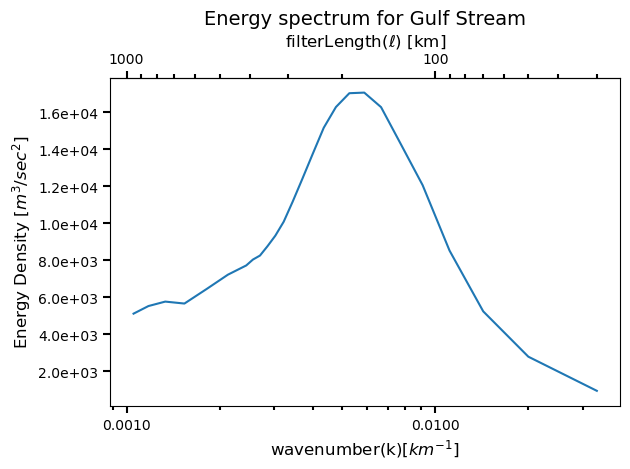

In [10]:
plotKE_Spectrum("Gulf")

/local_scratch/17624417/ipykernel_28652/1874851410.py:50: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x
/local_scratch/17624417/ipykernel_28652/1874851410.py:69: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()
/local_scratch/17624417/ipykernel_28652/1874851410.py:50: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x
/local_scratch/17624417/ipykernel_28652/1874851410.py:69: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()
/local_scratch/17624417/ipykernel_28652/1874851410.py:50: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x
/local_scratch/17624417/ipykernel_28652/1874851410.py:69: UserWarning: This figure was using constrained_layout, but that is incompatible w

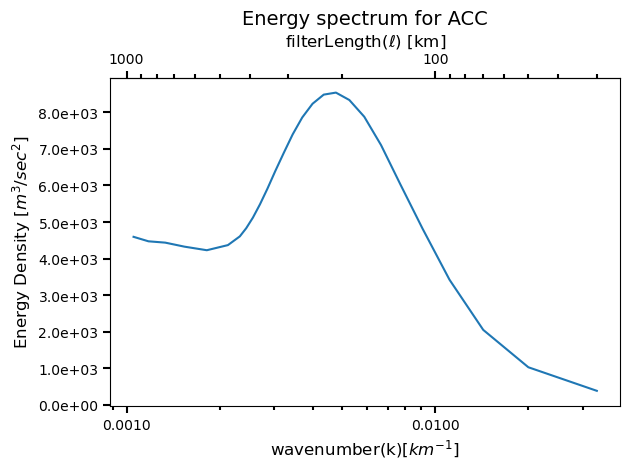

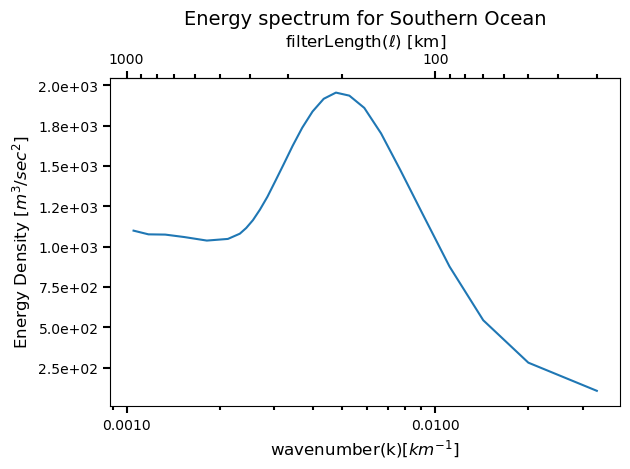

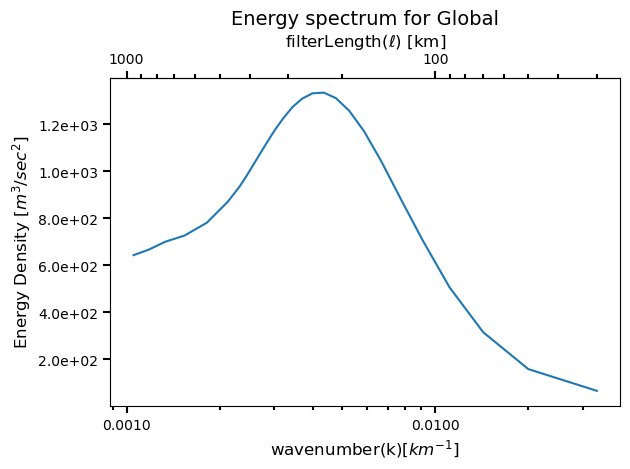

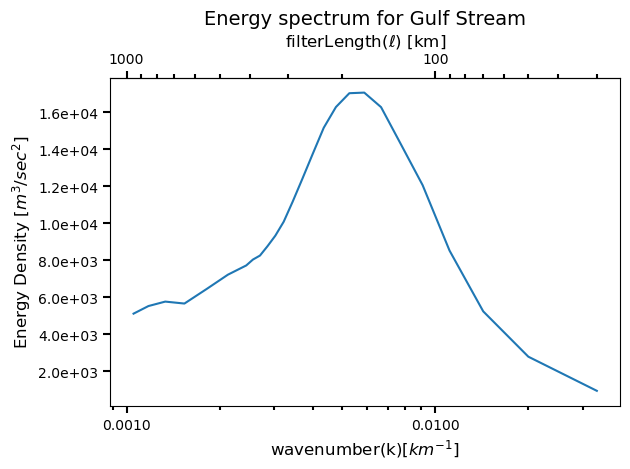

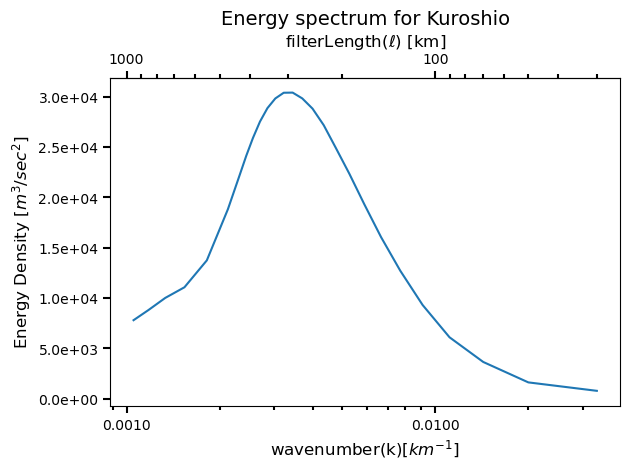

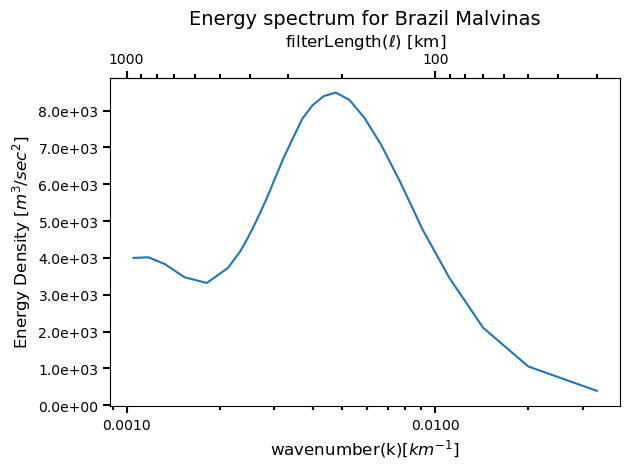

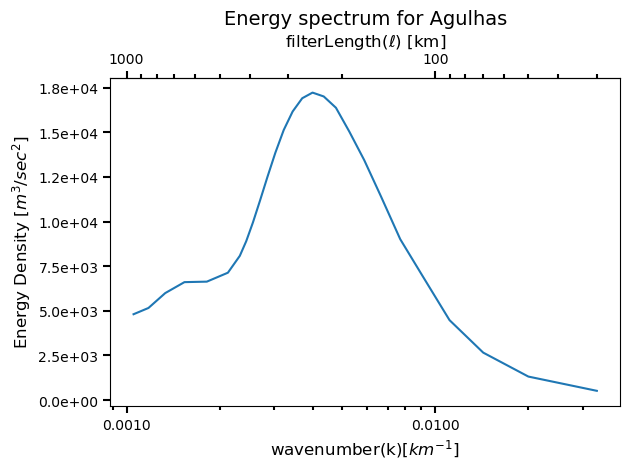

In [11]:
for maskName in maskList:
    plotKE_Spectrum(maskName)

In [10]:
print(matplotlib.__version__)

3.5.1


In [11]:
def get_bandIntegral(maskName, lower, upper):
    U2 = np.copy(MeanKE)
    UAREA2 = np.copy(readUAREA)
    maskArr = np.array(maskDs.variables[maskName])
    mask = maskArr < 1
    #mask = mask + np.array(maskDs.variables['Equator'])
    
    maskEq = abs(ULAT) < 15.0
    mask = mask + maskEq
    
    UAREA = np.ma.array(UAREA2, mask=mask, fill_value=0.0).filled()


    U2_pop = np.copy(MeanKE_pop)
    UAREA2_pop = np.copy(readUAREA_pop)
    maskArr_pop = np.array(maskDs2.variables[maskName])
    
    mask_pop = maskArr_pop < 1
    
    maskEq_pop = abs(ULAT_pop) < 15.0
    mask_pop = mask_pop + maskEq_pop
    
    UAREA_pop = np.ma.array(UAREA2_pop, mask=mask_pop, fill_value=0.0).filled()
    
    gU2 = np.zeros((nFilter,), dtype=float)
    gU2_pop = np.zeros((nFilter,), dtype=float)


    for i in range(nFilter):
        U_2 = np.ma.array(U2[i, :, :], mask=mask, fill_value=0.0).filled()
        gU2[i] = np.sum(U_2 * UAREA[:, :]) / (np.sum(UAREA[:, :]))

        U_2_pop = np.ma.array(U2_pop[i, :, :], mask=mask_pop, fill_value=0.0).filled()
        gU2_pop[i] = np.sum(U_2_pop * UAREA_pop[:, :]) / (np.sum(UAREA_pop[:, :]))
    
    
    dE_thisMask = np.roll(gU2, -1) - gU2
    l2dE_thisMask = dE_thisMask[0:nFilter-1] * midEll**2

    dE_thisMask_pop = np.roll(gU2_pop, -1) - gU2_pop
    l2dE_thisMask_pop = dE_thisMask_pop[0:nFilter-1] * midEll**2
    
    y= -dE_thisMask #-l2dE_thisMask/dell
    y_pop= -dE_thisMask_pop #-l2dE_thisMask_pop/dell
    
    lindex = list(lenScaleList).index(lower)
    uindex = list(lenScaleList).index(upper)
    
    Aviso_val = gU2[lindex] - gU2[uindex] #0.0
    POP_val = gU2_pop[lindex] - gU2_pop[uindex] #0.0
#     for d in range(lindex, uindex):
#         Aviso_val += y[d] #* dell[d]
#         POP_val += y_pop[d] #* dell[d]
    
    return list([Aviso_val, POP_val])
        
        

    

In [12]:
av_pop = list([get_bandIntegral('Global', 0, 50),
               get_bandIntegral('Global', 50, 60),
               get_bandIntegral('Global', 60, 80),
               get_bandIntegral('Global', 80, 100),
               
               get_bandIntegral('Global', 100, 120),
               get_bandIntegral('Global', 120, 140),
               get_bandIntegral('Global', 140, 160),
               get_bandIntegral('Global', 160, 180),
               get_bandIntegral('Global', 180, 200),
               
               get_bandIntegral('Global', 200, 220),
               get_bandIntegral('Global', 220, 240),
               get_bandIntegral('Global', 240, 260),
               get_bandIntegral('Global', 260, 280),
               get_bandIntegral('Global', 280, 300),
               
               get_bandIntegral('Global', 300, 320),
               get_bandIntegral('Global', 320, 340),
               get_bandIntegral('Global', 340, 360),
               get_bandIntegral('Global', 360, 400),
               get_bandIntegral('Global', 400, 500),
               get_bandIntegral('Global', 500, 600),
               
              ])



In [13]:
def findBandsRegion(region):
    av_pop = list([get_bandIntegral(region, 0, 50),
                   get_bandIntegral(region, 50, 60),
                   get_bandIntegral(region, 60, 80),
                   get_bandIntegral(region, 80, 100),

                   get_bandIntegral(region, 100, 120),
                   get_bandIntegral(region, 120, 140),
                   get_bandIntegral(region, 140, 160),
                   get_bandIntegral(region, 160, 180),
                   get_bandIntegral(region, 180, 200),

                   get_bandIntegral(region, 200, 220),
                   get_bandIntegral(region, 220, 240),
                   get_bandIntegral(region, 240, 260),
                   get_bandIntegral(region, 260, 280),
                   get_bandIntegral(region, 280, 300),

                   get_bandIntegral(region, 300, 320),
                   get_bandIntegral(region, 320, 340),
                   get_bandIntegral(region, 340, 360),
                   get_bandIntegral(region, 360, 400),
                   get_bandIntegral(region, 400, 500),
                   get_bandIntegral(region, 500, 600),

                  ])

    x = np.arange(60,370,20)
    x2 = np.array([50,400,500,600])
    x = np.concatenate((x,x2))
    x = np.sort(x)
    plt.figure(figsize = (15,7))
    plt.plot(x,np.log(np.array(av_pop)))
    plt.title(region)
    plt.xticks(x)


In [14]:
regionBar = 'SouthernOcean'
findBandsRegion(regionBar)

In [15]:
regionBar = 'Global'
def autolabel(ax, rects, fracts):
    """
    Attach a text label above each bar displaying its height
    """
    for i in range(len(rects)):
        rect = rects[i]
        fract = fracts[i]
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '%.2f' % fract,
                ha='center', va='bottom')
                       
def getBarPlot(region):
    av_pop = list([get_bandIntegral(region, 0, 50),
                   get_bandIntegral(region, 50, 100),
                   get_bandIntegral(region, 100, 200),
                   get_bandIntegral(region, 200, 400),               
                  ])
    labels = ["(0, 50)",
             "(50, 100)",
             "(100, 200)",
             "(200, 400)"]
    total = get_bandIntegral(region, 0, 400)
    total = list([total, total, total, total])
                   
    fracts = np.array(av_pop)/np.array(total)               
                   
    
    
    x = np.arange(len(labels))  # the label locations
    width = 0.4
    fig, ax = plt.subplots(figsize=(5,3))
    ax.set_rasterization_zorder(0)


    rects1 = ax.bar(x - width/2, np.array(av_pop)[:,0], width, label='AVISO')
    rects2 = ax.bar(x + width/2, np.array(av_pop)[:,1], width, label='POP')
    
    ymax = np.max(np.array(av_pop))
    print('ymax',ymax)
    
    ax.set_ylim(0,1.10*ymax)
    autolabel(ax, rects1, fracts[:,0])
    autolabel(ax, rects2, fracts[:,1]) 
    
    
    plt.xlabel(r'Length-scale$(\ell)~[km]$', fontsize = 12)
    plt.ylabel(r'Energy [$m^2/sec^2$]', fontsize =12)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(RegionName[region])
    #ax.invert_yaxis()
    plt.legend()
    plt.tight_layout()
    plt.savefig(region + '_EnergyBand_barPlot.pdf', dpi = 150, format='pdf')

getBarPlot(regionBar)

ymax 0.006800518311984131


In [16]:
labels = ["(0, 50)",
         "(50, 60)",
         "(60, 80)",
         "(80, 100)" ,              
         "(100, 120)",
         "(120, 140)",
         "(140, 160)",
         "(160, 180)",
         "(180, 200)",      
         "(200, 220)",
         "(220, 240)",
         "(240, 260)",
         "(260, 280)",
         "(280, 300)",       
         "(300, 320)",
         "(320, 340)",
         "(340, 360)",
         "(360, 400)",
         "(400, 500)",
         "(500, 600)"]

In [17]:
plt.plot(labels,av_pop)
plt.legend(['AVISO', 'POP'])
plt.xlabel(r'$Filterlength~(\ell)~[km]$', fontsize = 12)
plt.ylabel(r'Energy Density [$m^4/sec^2$]', fontsize =12)
    

Text(37.89999999999999, 0.5, 'Energy Density [$m^4/sec^2$]')

In [18]:
x = np.arange(len(labels))  # the label locations
width = 0.2
fig, ax = plt.subplots(figsize=(12,12))

rects1 = ax.barh(x - width/2, np.array(av_pop)[:,0], width, label='AVISO')
rects2 = ax.barh(x + width/2, np.array(av_pop)[:,1], width, label='POP')
plt.ylabel(r'$Filterlength~(\ell)~[km]$', fontsize = 12)
plt.xlabel(r'Energy Density [$m^2/sec^2$]', fontsize =12)

ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
plt.legend()

In [19]:
av_pop = list([get_bandIntegral('Global', 0, 50),
               get_bandIntegral('Global', 50, 100),
               get_bandIntegral('Global', 100,200),
               get_bandIntegral('Global', 200,400),               
              ])


In [20]:
labels = ["(0, 50)",
         "(50, 100)",
         "(100,200)",
         "(200, 400)"]

In [21]:
x = np.arange(len(labels))  # the label locations
width = 0.2
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x - width/2, np.array(av_pop)[:,0], width, label='AVISO')
rects2 = ax.bar(x + width/2, np.array(av_pop)[:,1], width, label='POP')
plt.xlabel(r'$Filterlength~(\ell)~[km]$', fontsize = 12)
plt.ylabel(r'Energy Density [$m^2/sec^2$]', fontsize =12)

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.invert_yaxis()
plt.legend()

In [22]:
getBarPlot('Gulf')

ymax 0.06212635806575398


In [23]:
def getLinePlot(region):
    av_pop = list([get_bandIntegral(region, 0, 50),
                   get_bandIntegral(region, 50, 100),
                   get_bandIntegral(region, 100,200),
                   get_bandIntegral(region, 200,400),               
                  ])       
                   
    labels = ["(0, 50)",
             "(50, 100)",
             "(100,200)",
             "(200, 400)"]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.4
    fig, ax = plt.subplots(figsize=(5,3))
    ax.set_rasterization_zorder(0)


    line1 = ax.plot(x , np.array(av_pop)[:,0],label='AVISO')
    line2 = ax.plot(x , np.array(av_pop)[:,1],label='POP')
    
    ymax = np.max(np.array(av_pop))
    print('ymax',ymax)
    
    ax.set_ylim(0,1.10*ymax)
    
    
    plt.xlabel(r'Length-scale$(\ell)~[km]$', fontsize = 12)
    plt.ylabel(r'Energy [$m^2/sec^2$]', fontsize =12)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(RegionName[region])
    #ax.invert_yaxis()
    plt.legend()
    plt.tight_layout()
    plt.savefig(region + '_EnergyBand_linePlot.pdf', dpi = 150, format='pdf')

In [24]:
#getLinePlot('Global')
for maskName in maskList:
    getLinePlot(maskName)

ymax 0.021317676792543688
ymax 0.00728194951935671
ymax 0.006800518311984131
ymax 0.06212635806575398
ymax 0.05344973962544144
ymax 0.02492325455235705
ymax 0.038317633102328


<ipython-input-23-8bf0267c61f6>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,3))


In [25]:
MKE = np.array(TKEds.variables['TKE'])
plt.pcolormesh(TKE)
plt.clim(0,0.5)
plt.colorbar()

ValueError: too many values to unpack (expected 2)

In [ ]:
MKE = np.array(TKEds.variables['MKE'])
plt.pcolormesh(MKE)
plt.clim(0,0.1)
plt.colorbar()

In [ ]:
EKE = np.array(TKEds.variables['EKE'])
plt.pcolormesh(EKE)
plt.clim(0,0.1)
plt.colorbar()

In [ ]:
gulf_POP = np.array(maskDs2.variables['Gulf'])

In [ ]:
plt.pcolormesh(gulf_POP)

In [ ]:
TKE = np.array(TKEds_pop.variables['TKE']) * 1e-4
MKE = np.array(TKEds_pop.variables['MKE']) * 1e-4
EKE = np.array(TKEds_pop.variables['EKE']) * 1e-4
